In [1]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *
from plot_func import *

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool

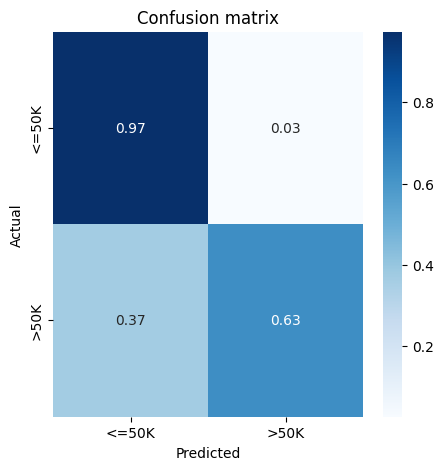

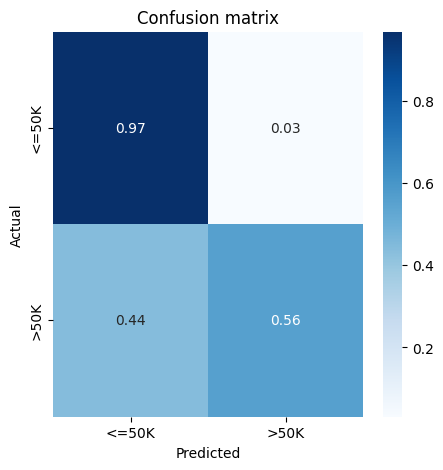

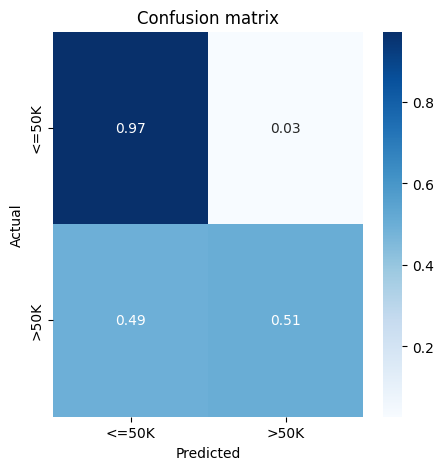

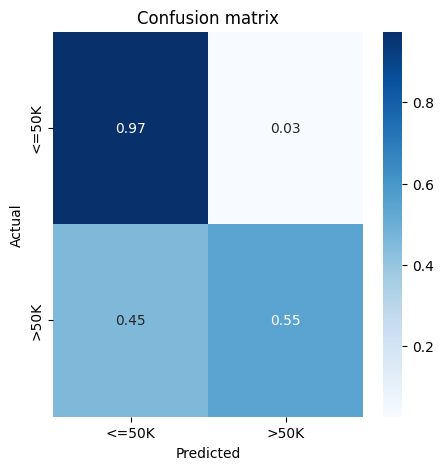

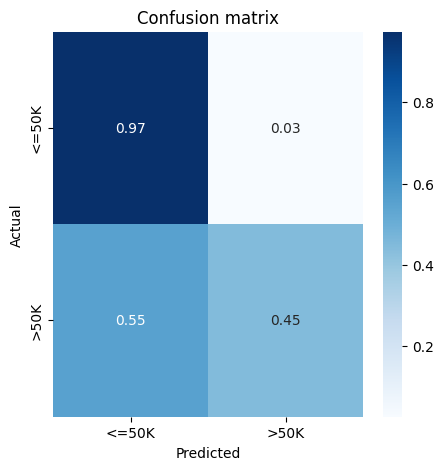

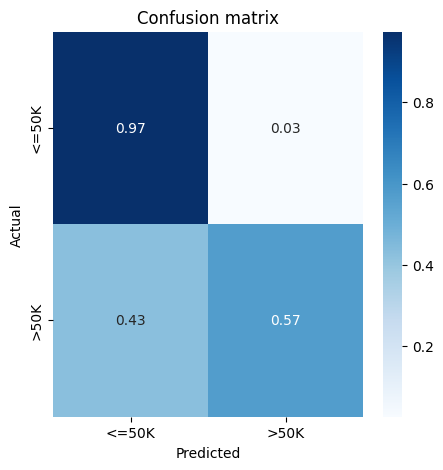

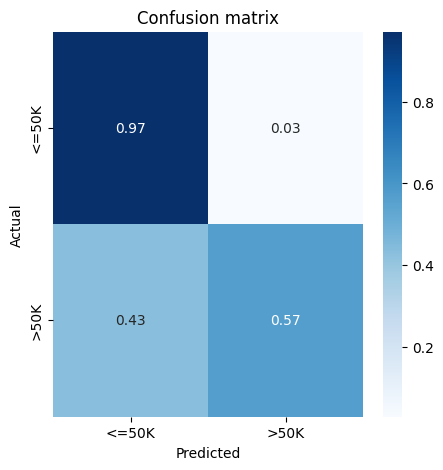

,accuracy,f1_macro,precision_macro,recall_macro
model,,,,
catboost,0.952945,0.797399,0.802508,0.792583
rf,0.946587,0.778033,0.772946,0.783445
logreg,0.943601,0.773873,0.760422,0.789354
svm,0.945613,0.772686,0.769328,0.776284
knn,0.944131,0.757554,0.764211,0.751468


In [2]:
models = {
    'knn': KNN,
    'svm': LinearSVC,
    'rf': RandomForestClassifier,
    'logreg': LogisticRegression,
    'catboost': CatBoostClassifier,
    'lda': LDA,
    'qda': QDA
}

df_tr = pd.read_csv('../train.csv')

TARGET_METRIC = 'f1_macro'
SEED = 42
CV_FOLDS = 5

results = pd.DataFrame(columns=['model', 'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'], dtype=float)
results.set_index('model', inplace=True)

for file in os.listdir('./results'):
    if file.endswith('.csv'):
        res = read_results('./results/'+file)
        prep_par, model_par = get_best_params('./results/'+file)
        mod_name = file.split('_')[1][:-4]
        model = models[mod_name](**model_par)
        score, y_pred, y_true = cross_validation(model, df_tr, prep_par, cv=CV_FOLDS, random_state=SEED, return_predict=True)

        results.loc[mod_name] = pd.Series(score)
        
        plot_conf_matrix(y_true, y_pred, './figures/conf_matrix_'+mod_name+'.pdf')

results = results.sort_values(by=TARGET_METRIC, ascending=False)
results.head()